In [10]:
library(Seurat)
library(Signac)
library(glue)
library(ggplot2)
library(GenomicRanges)
set.seed(1234)

setwd("~/projects/deepscore")
source("utils/multiple_scataq_analysis.R")

In [2]:
kidney.rna <- readRDS("~/projects/kidney/Nuc/kidney.rna.rds")
kidney.atac <- readRDS("~/projects/kidney/Atac/kidney.atac.rds")
kidney.multi <- readRDS("~/projects/kidney/Multi/kidney.multi.rds")

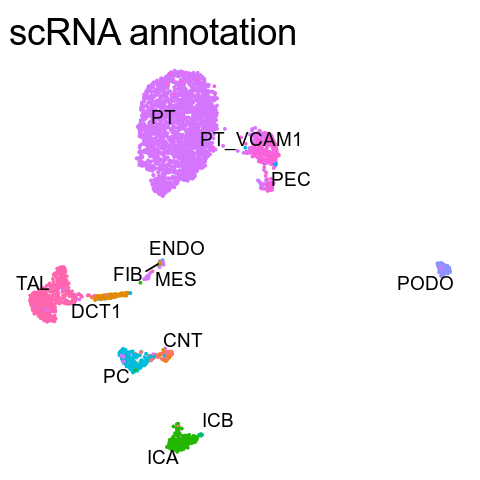

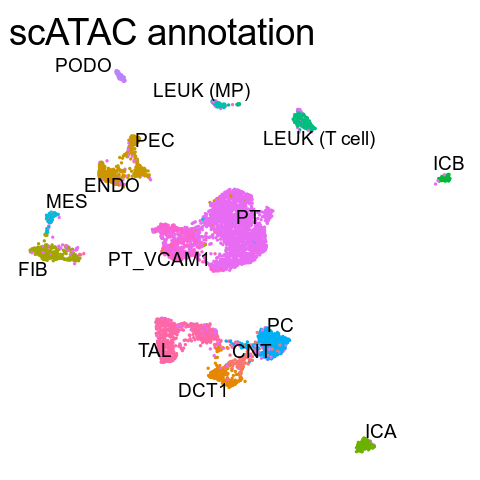

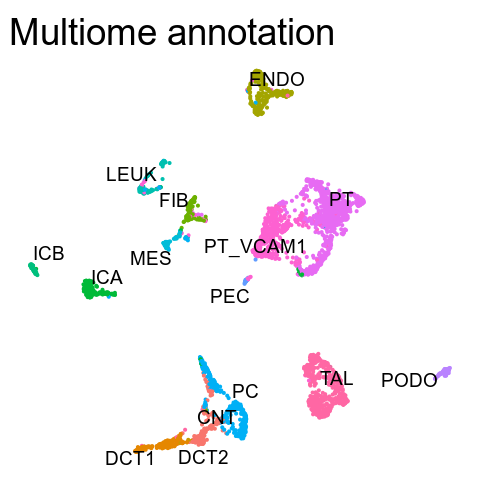

In [19]:
options(repr.plot.width=4, repr.plot.height=4)
DimPlot(kidney.rna, group.by = "annotation", label = T, repel = T) + 
    theme_void() + NoLegend() + theme(plot.title = element_text(size=22)) + ggtitle("scRNA annotation")
DimPlot(kidney.atac, group.by = "annotation", label = T, repel = T) + 
    theme_void() + NoLegend() + theme(plot.title = element_text(size=22)) + ggtitle("scATAC annotation")
DimPlot(kidney.multi, group.by = "annotation", label = T, repel = T) + 
    theme_void() + NoLegend() + theme(plot.title = element_text(size=22)) + ggtitle("Multiome annotation")

In [4]:
print(kidney.atac)
print(kidney.rna)
print(kidney.multi)

An object of class Seurat 
169042 features across 5638 samples within 3 assays 
Active assay: peaks (148802 features, 148802 variable features)
 2 other assays present: RNA, chromvar
 2 dimensional reductions calculated: lsi, umap
An object of class Seurat 
20967 features across 3760 samples within 1 assay 
Active assay: RNA (20967 features, 800 variable features)
 2 dimensional reductions calculated: pca, umap
An object of class Seurat 
292582 features across 3243 samples within 6 assays 
Active assay: peaks (108217 features, 108217 variable features)
 5 other assays present: RNA, ATAC, SCT, chromvar, geneactivity
 3 dimensional reductions calculated: lsi, pca, umap


In [5]:
# Common set of peaks
DefaultAssay(kidney.atac) <- "peaks"
DefaultAssay(kidney.multi) <- "peaks"
peaks_atac <- granges(kidney.atac)
peaks_multi <- granges(kidney.multi)
combpeaks <- reduce(c(peaks_atac, peaks_multi))
combpeaks <- combpeaks[width(combpeaks) < 10000 & width(combpeaks) > 20]
combpeaks

GRanges object with 154136 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1     181368-181568      *
       [2]     chr1     778279-779235      *
       [3]     chr1     821554-821943      *
       [4]     chr1     827160-827643      *
       [5]     chr1     869566-870235      *
       ...      ...               ...    ...
  [154132]     chrY 22317087-22317744      *
  [154133]     chrY 22332927-22333146      *
  [154134]     chrY 22367437-22367637      *
  [154135]     chrY 22373340-22373857      *
  [154136]     chrY 26670292-26671714      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [6]:
rm(kidney.rna, kidney.atac, kidney.multi)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,6919088,369.6,11046171,590.0,11046171,590.0
Vcells,268594430,2049.3,729210081,5563.5,676782589,5163.5


In [9]:
library(future)
plan(multisession)

# The folder must include the data objects and also the fragment file
# in the same format as CellRanger output (fragments.tsv.gz)
sample.folders <- list(c("~/projects/kidney/Atac", "kidney.atac.rds"),
                       c("~/projects/kidney/Multi", "kidney.multi.rds"))

combined.seu.objects <- lapply(sample.folders, build_combined_peak_seurat,
                               combpeaks, assay="peaks", drop_predictions = T)

~/projects/kidney/Atac/kidney.atac.rds


Computing hash

Extracting reads overlapping genomic regions



[1] "Feature Matrix has been created"
~/projects/kidney/Multi/kidney.multi.rds


Computing hash

Extracting reads overlapping genomic regions



[1] "Feature Matrix has been created"


In [70]:
# If reading the data from .RData objects:
load("~/projects/kidney/Nuc/kidney.rna.RData")
load("~/projects/kidney/Atac/kidney.atac_combpeaks.RData")
kidney.atac.comb <- seu

load("~/projects/kidney/Multi/kidney.multi_combpeaks.RData")
kidney.multi.atac.comb <- seu

rm(seu)

In [15]:
# If reading the data from an .rds objects:
kidney.rna <- readRDS("~/projects/kidney/Nuc/kidney.rna.rds")
kidney.atac.comb <- readRDS("~/projects/kidney/Atac/kidney.atac_combpeaks.rds")

kidney.multi.comb <- readRDS("~/projects/kidney/Multi/kidney.multi_combpeaks.rds")

In [ ]:
kidney.atac.comb <- combined.seu.objects[1][[1]]
kidney.multi.comb <- combined.seu.objects[2][[1]]

In [20]:
DefaultAssay(kidney.atac.comb) <- "peaks"
kidney.atac.comb <- DietSeurat(kidney.atac.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.atac.comb@reductions), 
                               graphs = names(kidney.atac.comb@graphs))

DefaultAssay(kidney.multi.comb) <- "peaks"
kidney.multi.comb <- DietSeurat(kidney.multi.comb, 
                               assays = c("peaks", "RNA"), 
                               dimreducs = names(kidney.multi.comb@reductions), 
                               graphs = names(kidney.multi.comb@graphs))

In [21]:
kidney.atac.comb
kidney.multi.comb
kidney.rna

An object of class Seurat 
173743 features across 5638 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
190737 features across 3243 samples within 2 assays 
Active assay: peaks (154136 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

An object of class Seurat 
20967 features across 3760 samples within 1 assay 
Active assay: RNA (20967 features, 800 variable features)
 2 dimensional reductions calculated: pca, umap

In [22]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,7237994,386.6,11046171,590.0,11046171,590.0
Vcells,618078587,4715.6,1512519462,11539.7,1260366118,9615.9


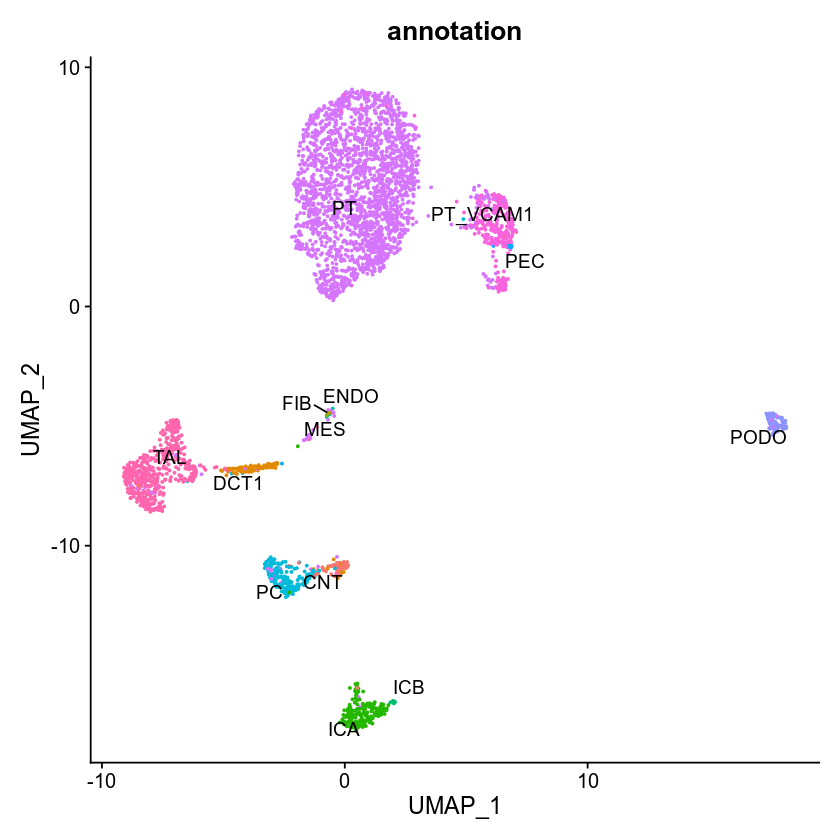

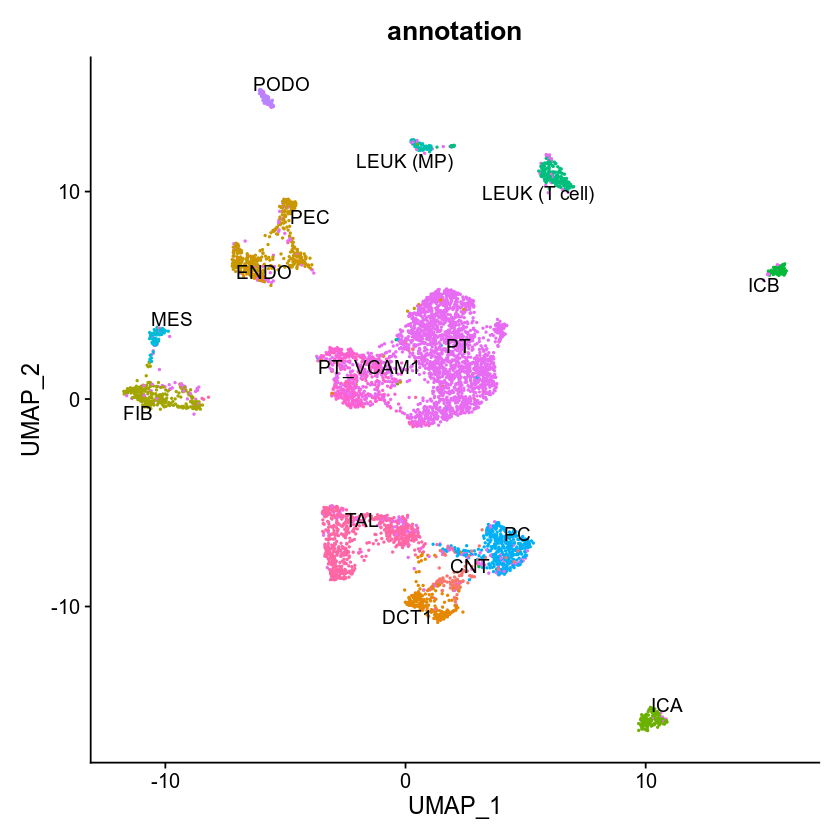

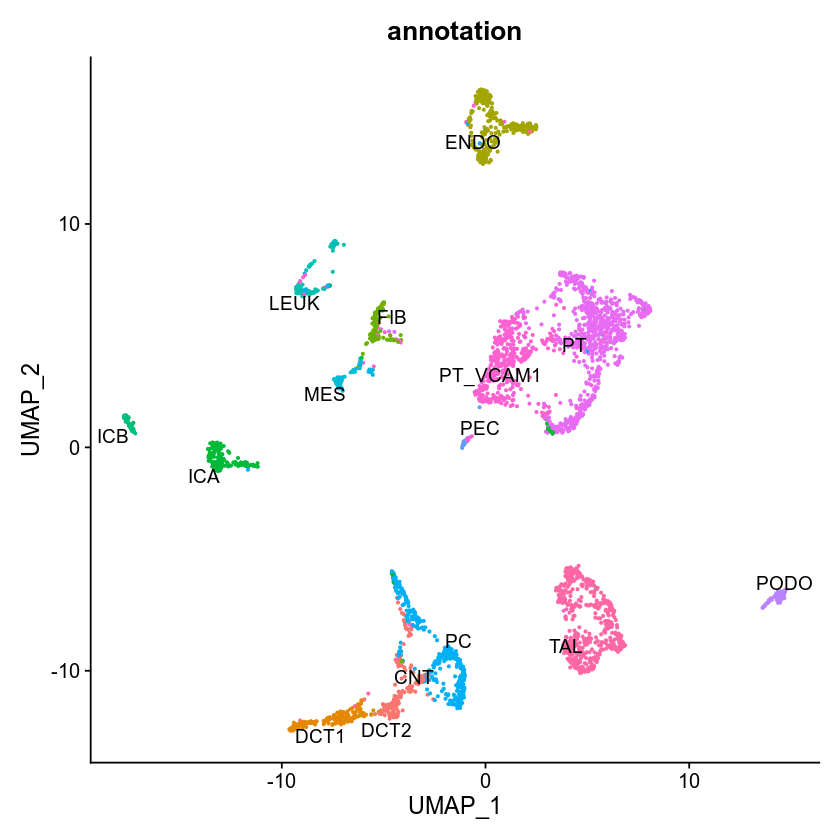

In [23]:
DimPlot(kidney.rna, group.by = "annotation", label = T, repel = T) + NoLegend()
DimPlot(kidney.atac.comb, group.by = "annotation", label = T, repel = T) + NoLegend()
DimPlot(kidney.multi.comb, group.by = "annotation", label = T, repel = T) + NoLegend()

In [2]:
devtools::install_github("cellgeni/sceasy")


✔  checking for file ‘/tmp/Rtmp63TAag/remotes66817224f7d5a/cellgeni-sceasy-d564af5/DESCRIPTION’
─  preparing ‘sceasy’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘sceasy_0.0.6.tar.gz’
   


In [7]:
# This needs to be run with a Python3 kernel
# The assay and conda environment with scanpy must be declared
!Rscript ../utils/seurat2anndata.R ~/projects/kidney/Atac/kidney.atac_combpeaks.rds      peaks     csg.r     # Atac
!Rscript ../utils/seurat2anndata.R ~/projects/kidney/Atac/kidney.atac_combpeaks.rds      RNA       csg.r     # Atac Gene Activity
!Rscript ../utils/seurat2anndata.R ~/projects/kidney/Multi/kidney.multi_combpeaks.rds    peaks     csg.r     # Multi Atac
!Rscript ../utils/seurat2anndata.R ~/projects/kidney/Multi/kidney.multi_combpeaks.rds    RNA       csg.r     # Multi RNA

Attaching SeuratObject
Drop predictions is: TRUE
Selected assay is: peaks
[1] "Converting from rds to h5ad"
Loading required package: Signac
/home/pab/miniconda3/envs/csg.r/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'nucleosome_group' as categorical
/home/pab/miniconda3/envs/csg.r/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'predicted.celltype' as categorical
/home/pab/miniconda3/envs/csg.r/lib/python3.9/site-pack

In [25]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/pab/miniconda3/envs/csg.r/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.24.0        GenomicRanges_1.46.1 GenomeInfoDb_1.30.0 
 [4] IRanges_2.28.0       S4Vectors_0.32.3     BiocGenerics_0.40.0 
 [7] glue_1.6.2           Signac_1.6.0         SeuratObject_4.0.4  
[10] Seurat_4.1.0        

loaded via a namespace (and not attached):
  [1] Rtsne_0.15    